<a href="https://colab.research.google.com/github/Sulthon-Araska/Stellar-Astrophysics/blob/main/Molecular%20Cloud%20Collapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stellar Formation: Molecular Cloud Collapse**
---

Nama: **Sulthon Furqandhani Araska**

NIM: **10321013**

Mata kuliah: **AS3113 Fisika Bintang**

Bab: **Evolusi Bintang**

In [26]:
# @title **Impor Libraries**

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sc
from scipy.integrate import solve_ivp
from IPython.display import display

# Constants:
π  = sc.pi
G  = sc.G
pc = sc.parsec

def Graph():
  plt.minorticks_on()
  plt.tick_params(axis='both', which='both', direction = "in", top="on", right="on")
  plt.tick_params(axis="both", which='major', length=5)
  plt.tight_layout()
  plt.legend()
  plt.grid()
  plt.xticks()
  plt.yticks()

# **1. Radius Pengkerutan Inti Awan Molecular terhadap Waktu**

 Kita nyatakan, mula-mula saat $t=0$, sebuah awan molekular (asumsikan berbentuk bola sempurna) memiliki radius $r=R$. Awan molekuler akan menggumpal secara isotermal dengan laju pengkerutan:

$ \frac{dr}{dt} = -\sqrt{\frac{8πGρ_0 R^2}{3}(\frac{R}{r}-1)} $

Kita misalkan:

$ \frac{r}{R} \equiv \cos^2\theta \to \frac{1}{R}\frac{dr}{dt} = -\sin(2\theta) \frac{d\theta}{dt} \to \frac{r}{t} = -R\sin(2\theta)\frac{d\theta}{dt} $

sehingga,

$ -R\sin(2\theta)\frac{d\theta}{dt} = -\sqrt{\frac{8πGρ_0 R^2}{3}} \sqrt{\frac{1}{\cos^2(\theta)}-1} $

$ \frac{d\theta}{dt} = \frac{1}{R\sin(2\theta)} \sqrt{\frac{8πGρ_0 R^2}{3}} \sqrt{\sec^2(\theta)-1} $

$ \frac{d\theta}{dt} = \frac{\tan(\theta)}{R\sin(2\theta)} \sqrt{\frac{8πGρ_0 R^2}{3}} $

Untuk penyederhanaan, kita nyatakan:

$ A = \sqrt{\frac{8πGρ_0 R^2}{3}} $

dan kita tahu:

$ \tan(\theta) = \frac{\sin(\theta)}{\cos(\theta)} $,

$ \sin(2\theta) = 2\sin(\theta)\cos(\theta) $

Dengan demikian, persamaan di atas menjadi:

$ \frac{d\theta}{dt} = \frac{\sin(\theta)}{\cos(\theta)} \frac{A}{2\sin(\theta)\cos(\theta)} $

$ \frac{d\theta}{dt} = \frac{A}{2\cos(\theta)} $

Selanjutnya kita lakukan separasi variabel lalu integrasikan:

$ \frac{A}{2}\int{dt} = \int{\cos^2(\theta) dt} $

$ \frac{At}{2} + C = \frac{\theta}{2} + \frac{\sin(2\theta)}{4} $

Menggunakan syarat batas keadaan mula-mula: $ t=0 \to r=R \to \theta=0 $, kita peroleh nilai $C=0$, sehingga:

$ \frac{At}{2} = \frac{\theta}{2} + \frac{\sin(2\theta)}{4} $

**$ t = \frac{1}{A}[\theta + \frac{\sin(2\theta)}{2}] $**

Substitusikan kembali nilai $\theta$ sebelumnya:

$ \theta = \arccos(\sqrt{\frac{r}{R}}) \to \sin(2\theta) = \sin(\arccos(\sqrt{\frac{r}{R}})) = 2\sqrt{\frac{r}{R}}\sqrt{1-\frac{r}{R}} = 2\sqrt{\frac{r}{R} - (\frac{r}{R})^2} $

dan juga $A$ ke persamaan di atas. Maka, diperoleh fungsi berikut:

$ t = [\arccos(\sqrt{\frac{r}{R}}) + \sqrt{\frac{r}{R} - (\frac{r}{R})^2}] \sqrt{\frac{3}{8\pi G\rho_0}} $

Dalam grafik, kita bisa nyatakan sumbu horizontalnya adalah $t$ dan sumbu vertikalnya adalah rasio radius awan pada waktu tertentu terhadap radius awal: $\frac{r}{R} \equiv y$. Sehingga persamaan di atas bisa ditulis kembali menjadi:

$ t = [\arccos(\sqrt{y}) + \sqrt{y - y^2}] \sqrt{\frac{3}{8\pi G\rho_0}} $

Kurva akan dikontrol (variabel bebas) oleh $\rho_0$ untuk 3 jenis awan molekuler:
*   _Translucent molecular cloud_: $\rho_0 = 5\times10^{14}$ kg/m³
*   _Giant molecular cloud_: $\rho_0 = 10^{13}$ kg/m³
*   _Giant molecular cloud core_: $\rho_0 = 5\times10^{13}$ kg/m³

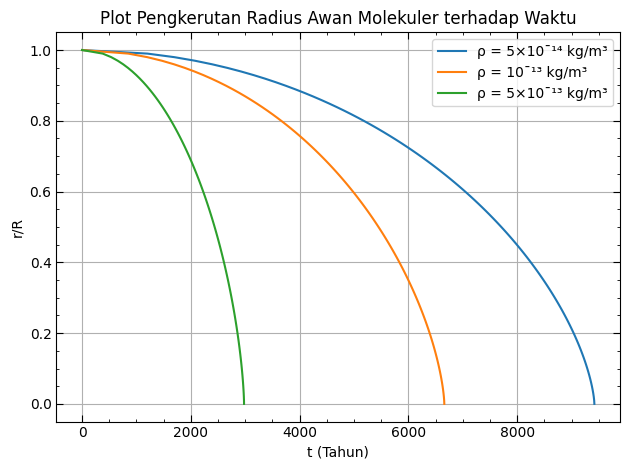

In [27]:
# @title **Codelines**


# Kerapatan untuk masing-masing jenis awan molekuler:
ρ = [5e-14, 1e-13, 5e-13]

# Rentang nilai rasio radius awan molekuler:
y1 = np.linspace(0, 1, 100)

# Definisikan fungsi keruntuhan awan molekuler:
def T(i):
  t = (np.arccos(np.sqrt(y)) + np.sqrt(y - y**2))*np.sqrt(3/(8*π*G*ρ[i]))/sc.year  # dalam satuan tahun
  return t

# Plot kurva perubahan radius awan molekuler terhadap waktu
plt.plot(T(0), y1, label='ρ = 5×10¯¹⁴ kg/m³')
plt.plot(T(1), y1, label='ρ = 10¯¹³ kg/m³')
plt.plot(T(2), y1, label='ρ = 5×10¯¹³ kg/m³')
plt.xlabel('t (Tahun)')
plt.ylabel('r/R')
plt.title('Plot Pengkerutan Radius Awan Molekuler terhadap Waktu')
Graph()

# **2. Skala Waktu Jatuh Bebas Keruntuhan Awan Molekuler**

Waktu yang dibutuhkan untuk sebuah massa awan molekuler dengan kerapatan $\rho_0$ adalah:

$ t_{ff} = \sqrt{\frac{3\pi}{32G\rho_0}} $

Sementara fungsi waktu yang telah berlalu ketika awan telah mengkerut seberapa jauh dari radius awalnya diberikan oleh:

$ t = [\arccos(\sqrt{\frac{r}{R}}) + \sqrt{\frac{r}{R} - (\frac{r}{R})^2}] \sqrt{\frac{3}{8\pi G\rho_0}} $

Dengan demikian, fraksi waktu yang telah berlalu terhadap waktu jatuh bebas adalah:

$ \frac{t}{t_{ff}} = \frac{2}{\pi}[\arccos(\sqrt{\frac{r}{R}}) + \sqrt{\frac{r}{R} - (\frac{r}{R})^2}] $

Dengan asumsi bahwa massa awan konstan, selama keruntuhan, radius (dan tentunya volume) awan akan mengecil dan, bersamaan dengan itu, massa jenisnya akan meningkat. Secara matematis, dituliskan:

$ \rho ∝ r^{-3} \to \frac{\rho}{\rho_0} = (\frac{r}{R})^{-3} \to \frac{r}{R} = (\frac{\rho_0}{\rho})^{\frac{1}{3}} $

Hubungan ini bisa kita terapkan ke persamaan sebelumnya:

$ \frac{t}{t_{ff}} = \frac{2}{\pi}[\arccos\sqrt[6]{\frac{\rho_0}{\rho}} + \sqrt{(\frac{\rho_0}{\rho})^{\frac{1}{3}} - (\frac{\rho_0}{\rho})^{\frac{2}{3}}}] $

Sebagaimana sebuah "fraksi", berlaku rentang nilai $0 \leq \frac{t}{t_{ff}},\frac{r}{r_0} \leq 1$. Dalam grafik kali ini, sumbu horizontal diberikan oleh $\frac{t}{t_{ff}}$ sementara sumbu vertikal diberikan oleh $\frac{\rho}{\rho_0}$. Karena itu, kita bisa nyatakan $\frac{t}{t_{ff}} \equiv x$ dan  $ \frac{\rho}{\rho_0} \equiv y$ untuk di persamaan:

$ x = \frac{2}{\pi}[\arccos(y^{-\frac{1}{6}}) + \sqrt{y^{-\frac{1}{3}} - y^{-\frac{2}{3}}}] $

<ipython-input-29-35e5c5d25623>:4: RuntimeWarning: divide by zero encountered in power
  y2 = (np.linspace(1,0,1000))**(-3)   # ρ ∝ 1/r³


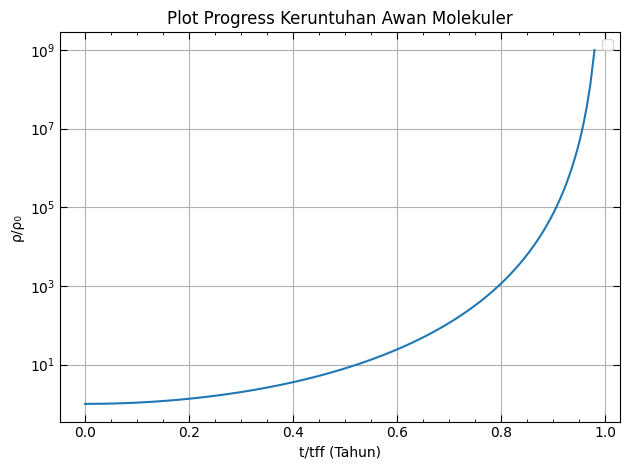

In [29]:
# @title **Codelines**

# Rentang nilai muliplikasi massa jenis awan molekuler:
y2 = (np.linspace(1,0,1000))**(-3)   # ρ ∝ 1/r³

# Fraksi waktu terhadap skala waktu jatuh bebas:
def x(y): return (2/π)*(np.arccos(y**(-1/6)) + np.sqrt(y**(-2/3) - y**(-2/3)))

# Plot kurva perubahan radius awan molekuler terhadap waktu
plt.plot(x(y2), y2)
plt.xlabel('t/tff (Tahun)')
plt.ylabel('ρ/ρ₀')
plt.yscale('log')
plt.title('Plot Progress Keruntuhan Awan Molekuler')
Graph()